<a href="https://colab.research.google.com/github/anirudhssundar/optimal_control/blob/main/6553_HW_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [107]:
import numpy as np
import matplotlib.pyplot as plt

In [108]:
def get_p(x,dt):
  # p = [x[-1]]
  p = [0]
  x_rev = x[::-1]
  for i in range(1,len(x)):
    # p_t_minus_dt = p[-1]*(1-dt) + 2*x_rev[i]*dt
    p_t_minus_dt = p[-1] - dt*(p[-1]/(2*np.sqrt(x_rev[i])) - (x_rev[i]-2.5))
    p.append(p_t_minus_dt)
  return np.array(p[::-1])

In [109]:
def get_u(t1,dt):
  t = np.arange(1000)
  dynu = []
  for i,foo in enumerate(t):
    if foo*dt < t_1:
      dynu.append(2)
    else:
      dynu.append(1)
  return dynu

In [110]:
def J(x,r,dt):
  val = 0.5*np.sum((x - r)**2)*dt
  return val

In [111]:
def dyn_u(t_1,dt):
  t = np.arange(1000)
  dynu = []
  for i,foo in enumerate(t):

    if foo*dt < t_1:
      dynu.append(2)
    else:
      dynu.append(1)
  
  dynx = get_trajectory(dynu,1.5,dt)
  cost = J(dynx,2.5,dt)
  return cost

In [112]:
def get_trajectory(u,x_0,dt):
  x = x_0
  x_fin = []
  x_fin.append(x_0)
  for i in u:
    x_dot = -np.sqrt(x) + i
    x_new = x_dot*dt + x
    x_fin.append(x_new)
    x = x_new 
  return np.array(x_fin)

t changed 7.183271789729308
t changed 6.1616338080206505
t changed 5.923614217291288
t changed 5.923597167128384
t changed 5.92358011696548
t changed 5.9235630668025765
t changed 5.923546016639673
t changed 5.923528966476769
5.923528966476769
1.9731518639637977


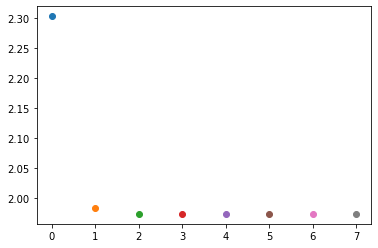

In [115]:
x_0 = 1.5
# t = 10
r = 2.5
t = np.arange(1000)
dt = 0.01
alpha=0.2
beta=0.5
tol = 1e-4

# for split in np.arange(5,7):
t_1 = 9

u = []
for i,foo in enumerate(t):
  if foo*dt < t_1:
    u.append(2)
  else:
    u.append(1)
x = np.array(get_trajectory(u,x_0,dt))
p = get_p(x,dt)
iters = 0

# ARMIJO STUFF
if abs(p[int(t_1*dt)])<tol:
  print("done")
else:
  while abs(p[int(t_1*dt)])>tol:
    if iters==8:
      break
    k=0
    while dyn_u(t_1 - (beta**k)*p[int(t_1*dt)],dt) > dyn_u(t_1,dt) -alpha*(beta**k)*(p[int(t_1*dt)]**2):
      k+=1
      # print(k)
      # print(dyn_u(t_1 - (beta**k)*p[int(t_1*dt)],dt))

      if k==10:
        break
    lambd = -(beta**k)/(beta**2)
    # beta = beta*2
    t_1 = t_1 + lambd*p[int(t_1*dt)]
    plt.scatter(iters, dyn_u(t_1,dt))
    print("t changed",t_1)

    u_new = get_u(t_1,dt)
    x_new = get_trajectory(u_new, x_0,dt)
    p = get_p(x_new,dt)
    iters+=1
#  J = 0.5*np.sum((x - r)**2)*dt
  # print(split, J)
print(t_1)
fin_u = []
for i,foo in enumerate(t):
  if foo*dt < t_1:
    fin_u.append(2)
  else:
    fin_u.append(1)
fin_x = np.array(get_trajectory(fin_u,x_0,dt))
fin_p = get_p(fin_x,dt)
fin_cost = J(fin_x, r, dt)
print(fin_cost)

In [ ]:
t_1 - (beta**k)*p[int(t_1*dt)]
-alpha*(beta**k)*(p[int(t_1*dt)]**2)

-1.822903691917414e-31

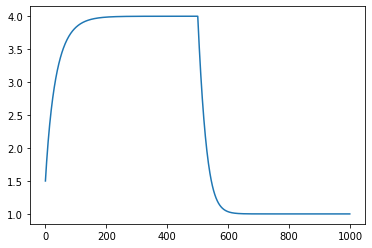

In [ ]:
plt.plot(t,x[:-1])

In [ ]:
cost = 0.5*np.sum((x - r)**2)*dt

In [ ]:
cost

9.924805914640503

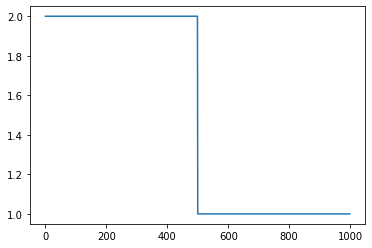

In [ ]:
plt.plot(u)

In [ ]:
p = get_p(x,dt)

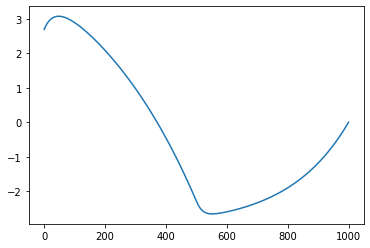

In [ ]:
plt.plot(fin_p)

In [ ]:
t_1

5.830230077839615